# Global Cancer Patients Analysis 

## Main motivation:

- Understand which characteristics in an individual is most likely to cause cancer. Characteristics includes age group, gender and region of the world the individual lives in. This could help the health industry target pateients earlier so that the appropriate tests can be carried out as preventative measures. Hospitals in certain areas can increase treatment equipment for certain cancers.
- Understand which environmental risk causes each type of cancer. Again, this could be useful understand an individuals likelihood of getting a certain type of cancer depending on their environmental risk profile.  
- Undersatnd which type of cancer has the longest survival time and cheapest treatment cost, as well as confirming whether it is region specific.
- Use Machine learning to predict if an individual is likely to get a certain type of cancer based on the individual's profile and environmental factors. This could facilitate hospitals with early detection of cancer cases and prevent people from suffereing the illness.

## Objectives and Hypothesis 

1. **What are the top features that influence each cancer type?**  
   **Hypothesis 1:** Lung cancer strongly correlates with Air Pollution and smoking.

2. **What age group, gender and countries are impacted most by cancer?**  
   **Hypothesis 2:** Cancer is most common at an older age, cancer will effect men more by a small margin in developed countries.

3. **Does earlier detection of cancer reduce cost but increase life expectancy?**  
   **Hypothesis 3:** Diagnosis at stage 0 or 1 will result in a higher life expectancy and lower treatment cost.



### Inputs: 
- Global Cancer patients analysis from kaggle: https://www.kaggle.com/datasets/zahidmughal2343/global-cancer-patients-2015-2024
### Outputs:
- Figure 1: 
-  Figure 2: 
- Figure 3: 
- Figure 4: 
- Figure 5: 
- Figure 6:
- Figure 7: 
- Figure 8: 

### **1. Load Libraries**

In [1]:
# Data manipulation
#===============================================================================
import pandas as pd
import numpy as np
# Data visualization
#===============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
#Check if you are working in the correct directory 
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\lacma\\OneDrive\\Documents\\Visual Studio 2019\\Global Cancer Patients Analysis\\Global-Cancer-Patients-Analysis'

### **2. Load data and analyse basic data information** 

In [4]:
#Read the csv file and set up a new data frame
df_raw_data=pd.read_csv('Global Cancer Patients analysis raw data.csv') #Load data set
df_raw_data.head(10) #Display first 10 lines of data 

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62
5,PT0000005,22,Male,Germany,2018,9.5,6.4,3.3,3.9,5.1,Cervical,Stage IV,33468.99,9.5,5.98
6,PT0000006,41,Male,Canada,2021,5.1,8.2,0.3,3.7,2.1,Cervical,Stage 0,9790.83,1.0,5.05
7,PT0000007,72,Female,Canada,2018,6.0,8.2,6.4,0.6,8.5,Prostate,Stage I,17161.40,6.2,6.02
8,PT0000008,21,Male,USA,2022,4.3,3.8,1.0,0.3,8.5,Lung,Stage II,56458.48,6.5,3.36
9,PT0000009,49,Female,Canada,2016,8.1,0.8,7.8,5.2,9.3,Prostate,Stage II,56133.45,5.7,5.76


In [5]:
#Create a summary of information of the raw data in preparation of data cleaning
print(f'The shape of the data frame is{df_raw_data.shape}')
print(f'The data types within the data frame are{df_raw_data.dtypes}')
print(f'The data that is duplicated are {df_raw_data.duplicated().sum()}')
print(f'The data that contain missing values are {df_raw_data.isnull().sum()}')

The shape of the data frame is(50000, 15)
The data types within the data frame arePatient_ID                object
Age                        int64
Gender                    object
Country_Region            object
Year                       int64
Genetic_Risk             float64
Air_Pollution            float64
Alcohol_Use              float64
Smoking                  float64
Obesity_Level            float64
Cancer_Type               object
Cancer_Stage              object
Treatment_Cost_USD       float64
Survival_Years           float64
Target_Severity_Score    float64
dtype: object
The data that is duplicated are 0
The data that contain missing values are Patient_ID               0
Age                      0
Gender                   0
Country_Region           0
Year                     0
Genetic_Risk             0
Air_Pollution            0
Alcohol_Use              0
Smoking                  0
Obesity_Level            0
Cancer_Type              0
Cancer_Stage             0
Treatment_

##### Summary of Data Information

- Data shape is medium size  
- Discrete data types are objects and continuous data types are floats or integers  
- Conversion of season year to datetime is beneficial for time series analysis or change into integer
- There are no duplicate values  
- There are no missing values in the raw data frame
- Requires conversion of the stage of cancer into integers
- Remove paient ID in new data frame as it is not important for the analysis 

### **3. Clean and preprocess data**

In [20]:
# Remove unecessary column 'ID'
#===============================================================================
df_clean = df_raw_data.drop('Patient_ID', axis = 1) #drop Id and rename data frame 
# Standardise all float columns to be rounded to two decimal places 
#=================================================================================
float_cols = df_clean.select_dtypes(include=['float']).columns 
df_clean[float_cols] = df_clean[float_cols].round(2)#round to 2dp
# Convert values in the cancer stage column to integer values so that they can be used in scatter plots 
#=======================================================================================================
df_clean['Cancer_Stage'].unique()
df_clean['Cancer_Stage'] = df_clean['Cancer_Stage'].map({'Stage 0': 0, 'Stage I': 1, 'Stage II': 2, 'Stage III':3, 'Stage IV':4, })
df_clean.head()

,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,3,62913.44,5.9,4.92
1,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,0,12573.41,4.7,4.65
2,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,2,6984.33,7.1,5.84
3,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,1,67446.25,1.6,3.12
4,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,3,77977.12,2.9,3.62


### do the. describe evaluation thing.. as well as all the t tests and other statistics stuff

### **4. Exploritory Analysis**

#### 4a. Q1: What are the top features that influence each cancer type 

In [19]:
cancer_types= df_clean['Cancer_Type'].unique()
cancer_types


array(['Lung', 'Leukemia', 'Breast', 'Colon', 'Skin', 'Cervical',
       'Prostate', 'Liver'], dtype=object)

In [37]:
df_features=df_clean[['Genetic_Risk','Air_Pollution','Alcohol_Use','Smoking','Obesity_Level','Cancer_Type']]


In [36]:
df_features_cancer_type=df_features.groupby(by=['Cancer_Type']).mean().round(2)
df_features_cancer_type

,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level
Cancer_Type,,,,,
Breast,5.03,5.00,4.97,5.01,4.95
Cervical,4.99,5.01,5.03,4.97,5.00
Colon,4.97,4.98,5.00,4.94,4.92
Leukemia,5.03,5.00,5.05,5.01,5.01
Liver,5.02,5.04,4.98,5.05,4.95
Lung,5.05,5.01,4.99,4.92,5.06
Prostate,4.99,4.99,5.05,4.95,5.03
Skin,4.93,5.06,5.00,5.08,5.01


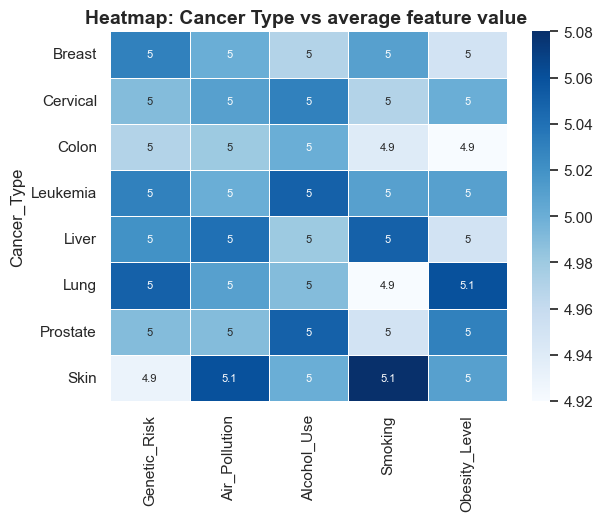

In [40]:
# Create heatmap of the newly formed table to visualise the which feature is most important to each cancer type
#===============================================================================
heatmap_figure=sns.set_theme(style="whitegrid") #format the grid colour settings 
sns.heatmap(data=df_features_cancer_type, annot=True, linewidths=0.5,annot_kws={"size": 8},cmap='Blues')# set up the heatmap 
plt.title("Heatmap: Cancer Type vs average feature value ", fontsize=14, fontweight='bold')
plt.show()#show the heatmap figure